<a href="https://colab.research.google.com/github/GUILLENJV/62f1ab79cc287b001f643389/blob/master/Multi_Class_Model_631d8277776f1d001a21e6eb_120922.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#learned embedding encoding for a neural network
from numpy import unique
import numpy
from numpy import array
import pandas as pd
import datetime 
from time import sleep
from tqdm import tqdm
import os
from pandas import read_csv
import json
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l1
from keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
#from predict import model 
from sklearn import preprocessing
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [7]:
# carga los datos
df = pd.read_excel('631d8277776f1d001a21e6eb_120922_clear.xlsx') 

In [8]:
df.head()

,campaign_id,landing_page_id,traffic_source_id,visitor_device_browser,visitor_device_hardware_family,visitor_device_hardware_model,visitor_device_hardware_vendor,visitor_device_os_family,visitor_device_os_vendor,visitor_device_os_version,visitor_device_type,visitor_geo_location_cityName,visitor_geo_location_connection_type,visitor_geo_location_isp,visitor_geo_location_regionName,visitor_tokens_adh,visitor_tokens_cadid,visitor_tokens_adi,converted_yes,converted_no
0,Other,631d72ff99ba21001a8503fa,57ac89e0a38746122f4af882,Safari,Macintosh,Macintosh,Apple,macOS,Apple,10.15.7,Desktop,Other,Corporate,Amazon.com,Other,Other,Other,Other,0,1
1,Other,631d779999ba21001a850416,57ac89e0a38746122f4af882,Other,Macintosh,Macintosh,Apple,macOS,Apple,Other,Desktop,Other,Cable/DSL,Comcast Cable,California,Other,Other,Other,0,1
2,Other,631d779999ba21001a850416,Other,Safari,Macintosh,Macintosh,Apple,Other,Apple,Other,Desktop,Ashburn,Corporate,Amazon.com,Virginia,Other,NaN,tsbatout,0,1
3,Other,631d72ff99ba21001a8503fa,Other,Other,Emulator,Unknown,Unknown,Other,Unknown,Unknown,Desktop,Other,Cable/DSL,Comcast Cable,New York,Other,NaN,tsbatout,0,1
4,Other,631d72ff99ba21001a8503fa,Other,Facebook for Android,Other,Other,Other,Android,Google,Other,Phone,Washington,Corporate,Cogent Communications,Other,Other,NaN,tsbatout,0,1


In [9]:
df.dtypes

campaign_id                             object
landing_page_id                         object
traffic_source_id                       object
visitor_device_browser                  object
visitor_device_hardware_family          object
visitor_device_hardware_model           object
visitor_device_hardware_vendor          object
visitor_device_os_family                object
visitor_device_os_vendor                object
visitor_device_os_version               object
visitor_device_type                     object
visitor_geo_location_cityName           object
visitor_geo_location_connection_type    object
visitor_geo_location_isp                object
visitor_geo_location_regionName         object
visitor_tokens_adh                      object
visitor_tokens_cadid                    object
visitor_tokens_adi                      object
converted_yes                            int64
converted_no                             int64
dtype: object

In [10]:
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_tokens_adh"] = df["visitor_tokens_adh"].apply(str)
df["visitor_tokens_cadid"] = df["visitor_tokens_cadid"].apply(str)
df["converted_yes"] = df["converted_yes"].apply(str)
df["converted_no"] = df["converted_no"].apply(str)

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 5.2 MB/s 


In [ ]:
import sweetviz as sv

In [ ]:
# Generar el reporte
sweet_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


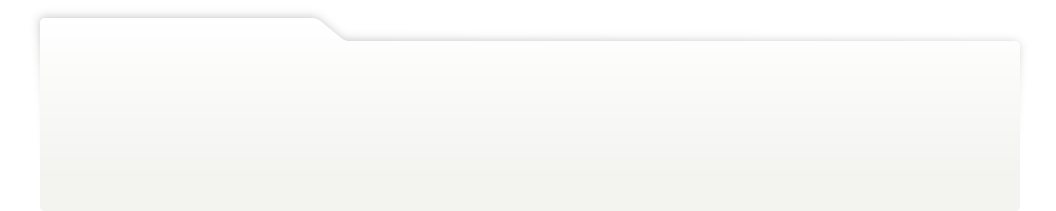
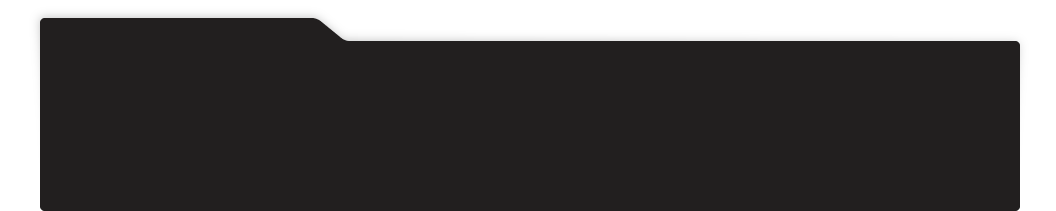
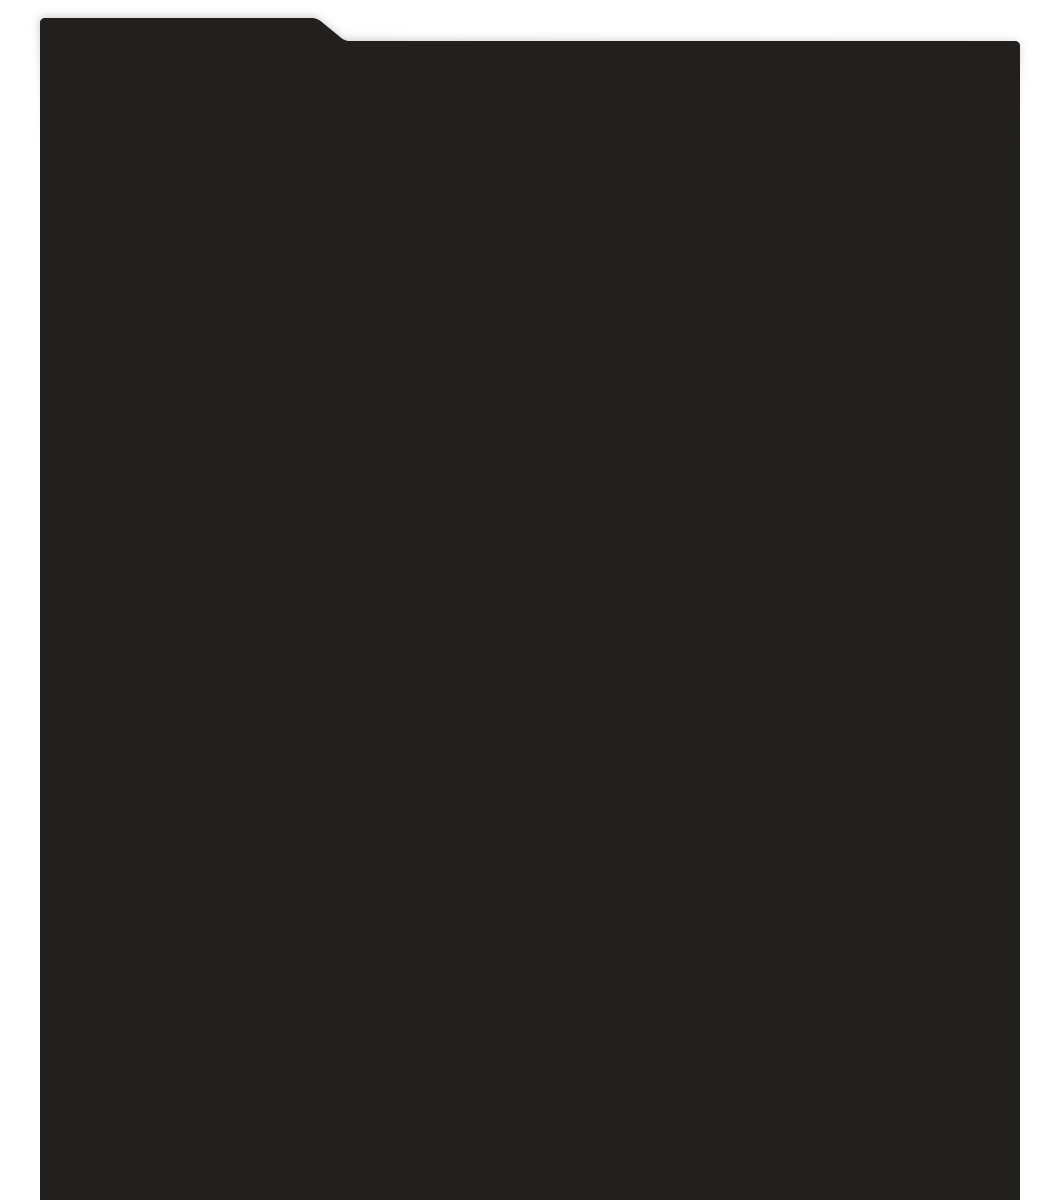
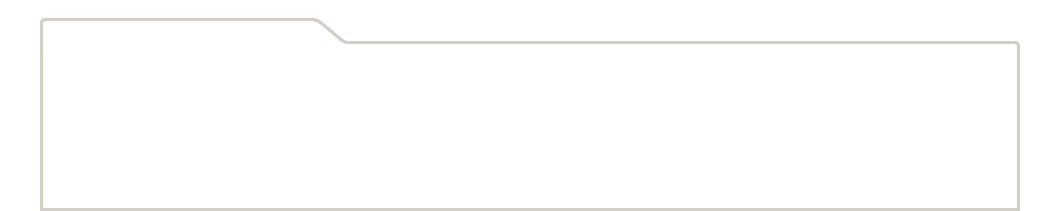
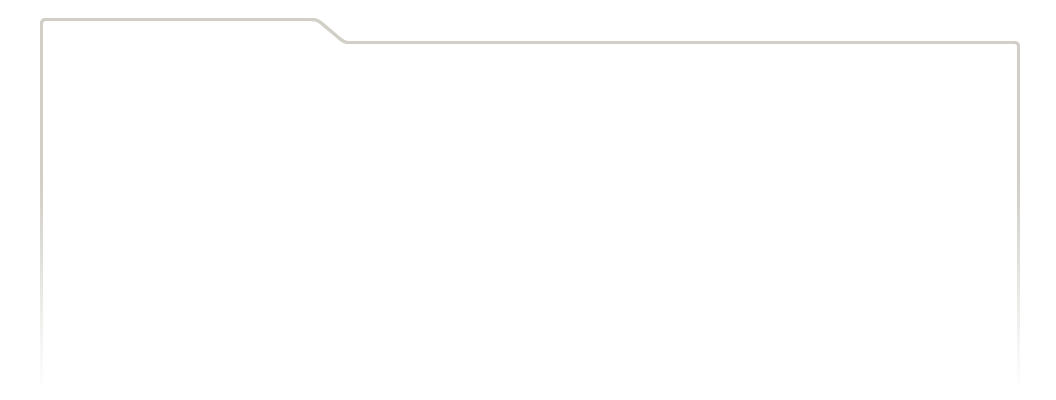
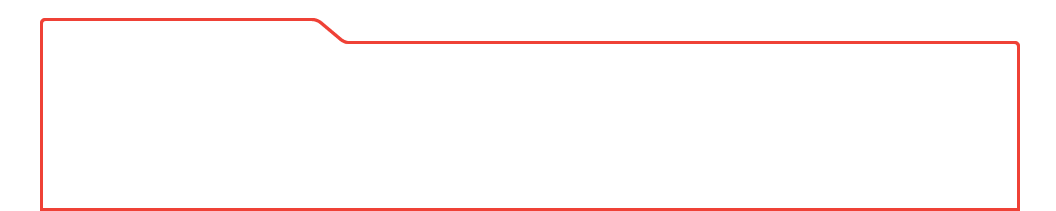
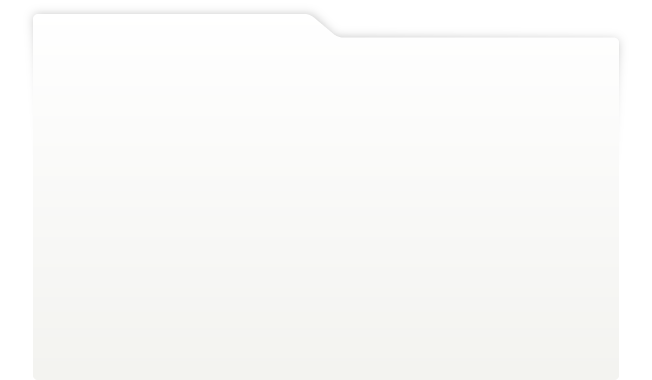
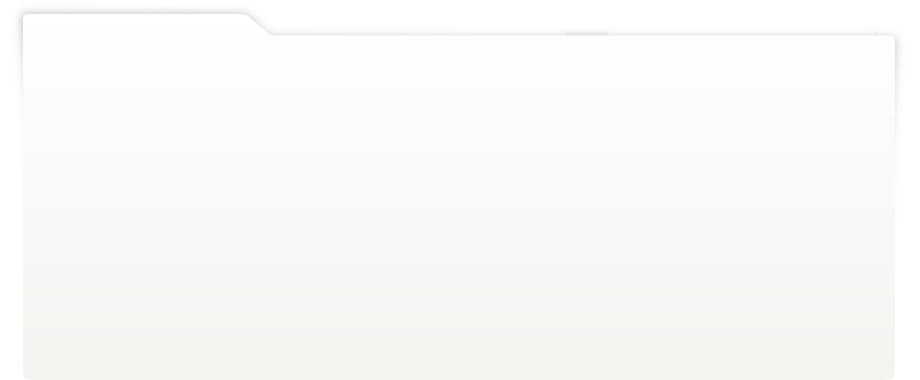
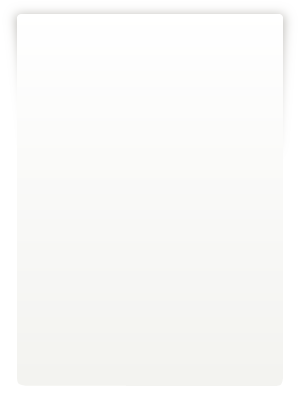
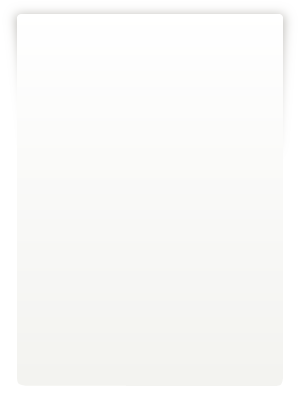
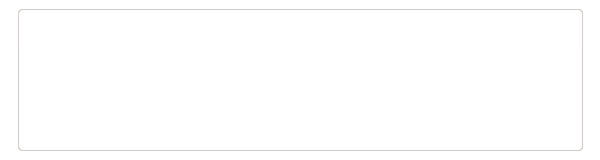
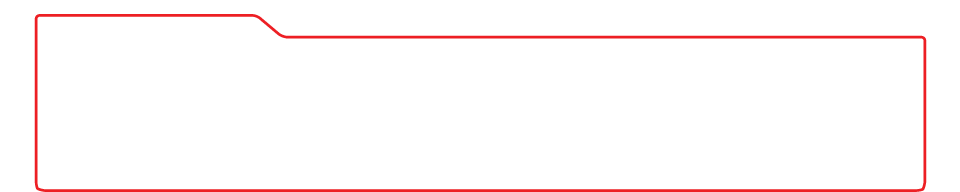
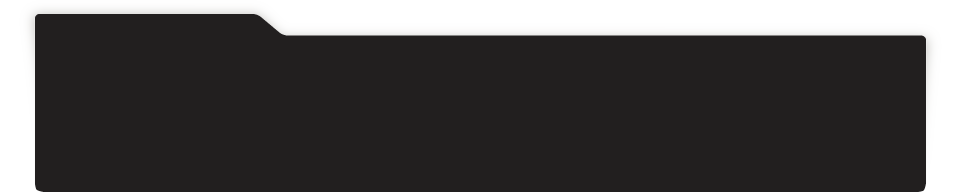
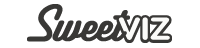
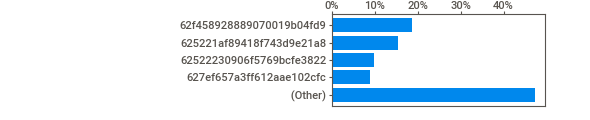
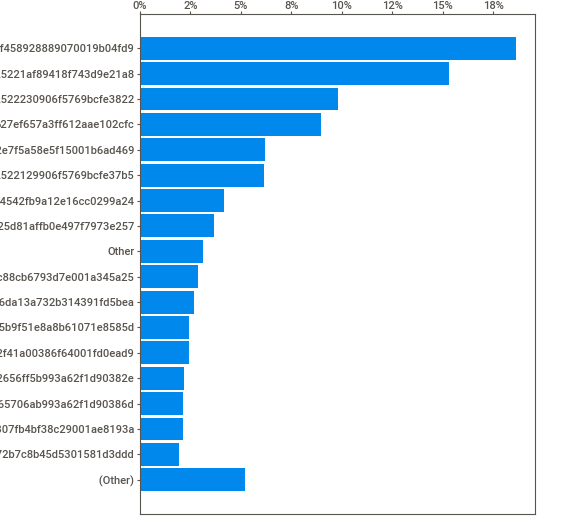
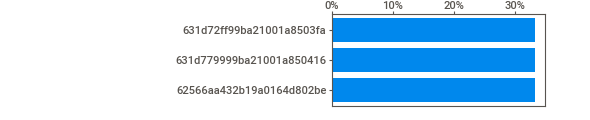
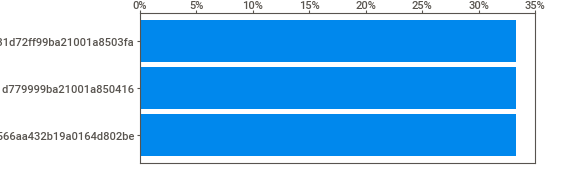
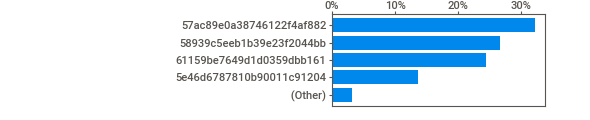
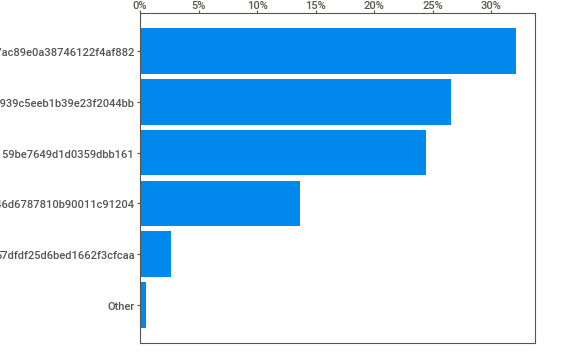
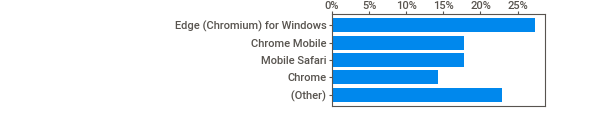
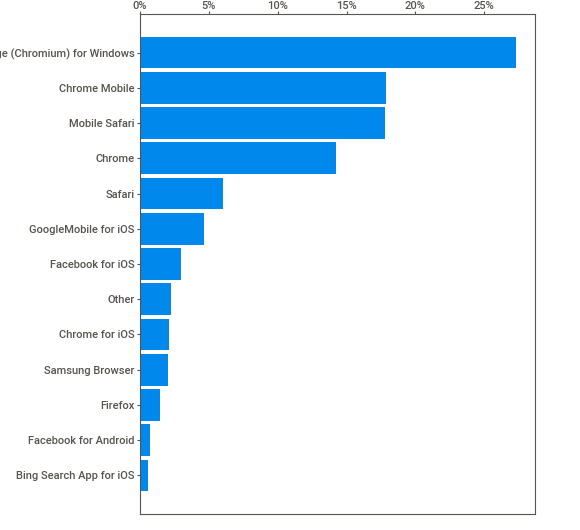
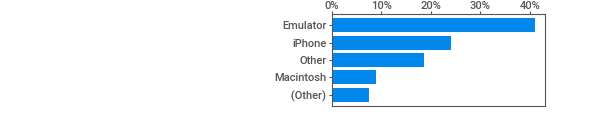
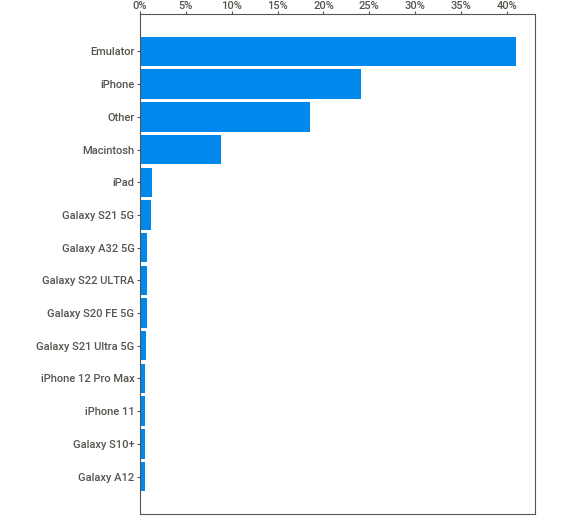
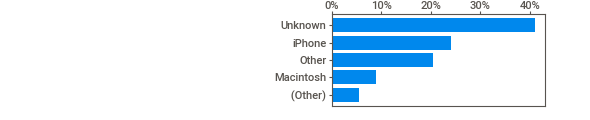
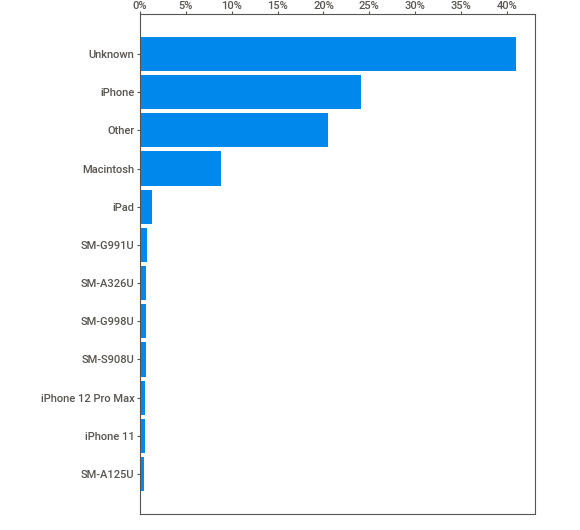
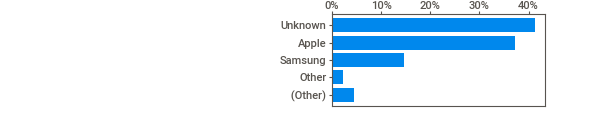
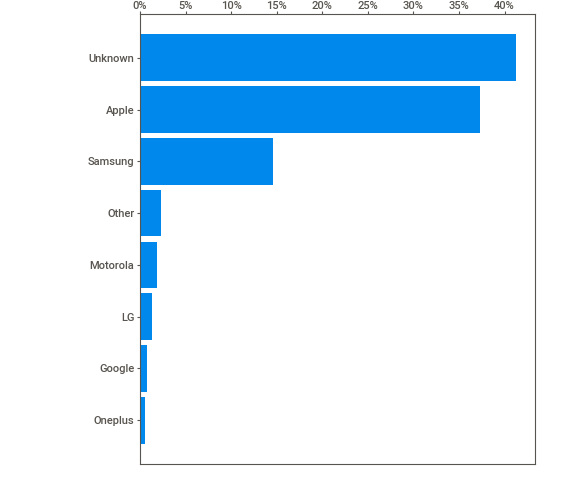
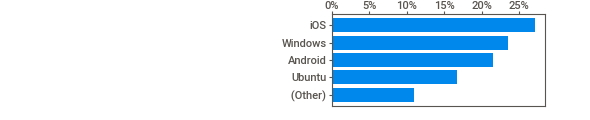
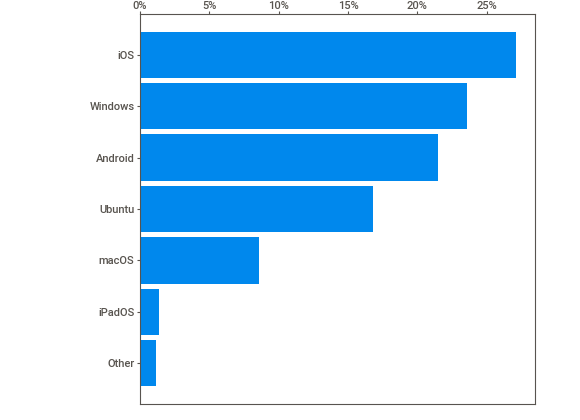
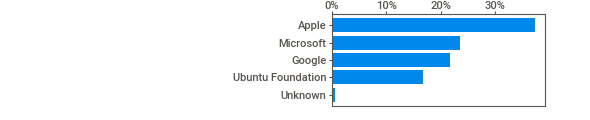
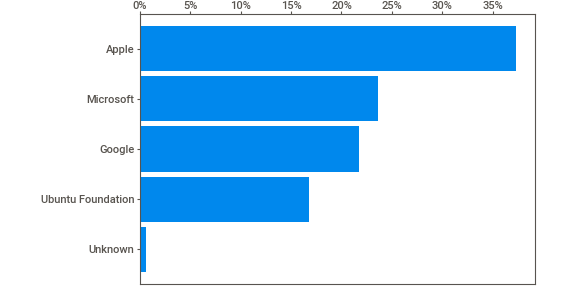
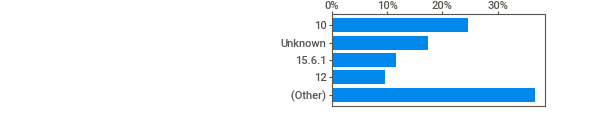
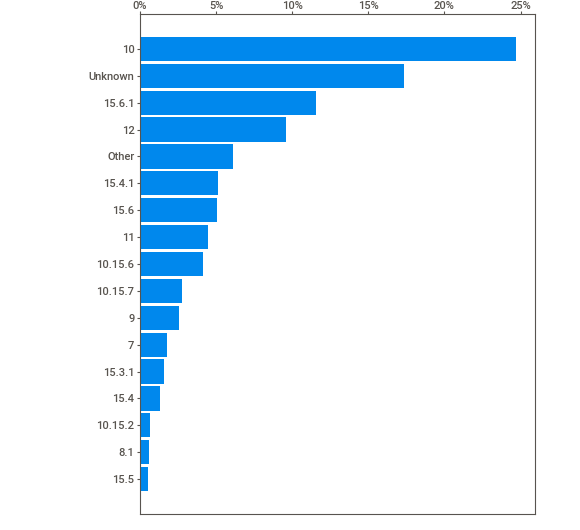
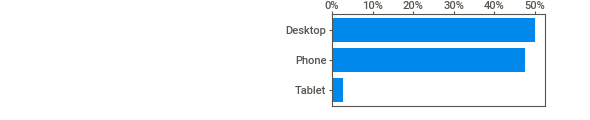
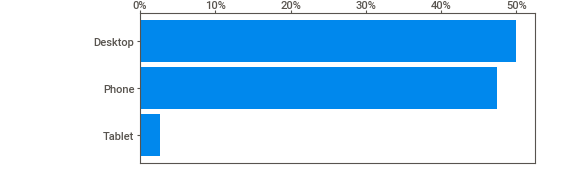
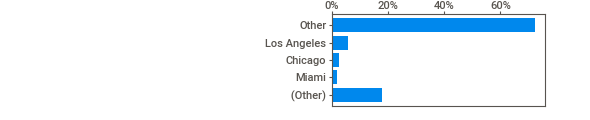
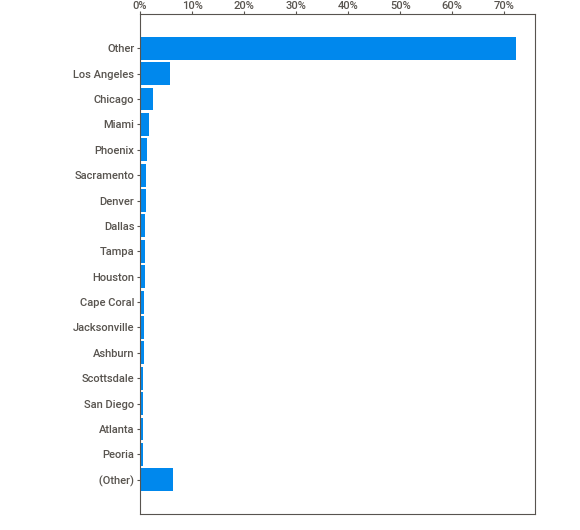
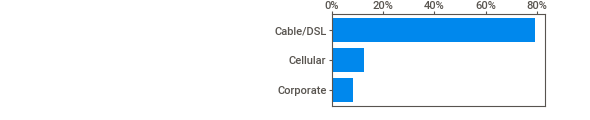
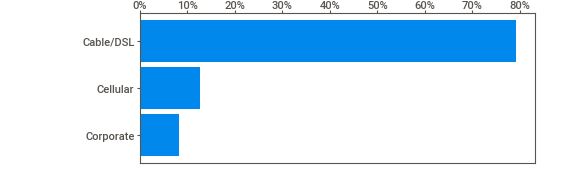
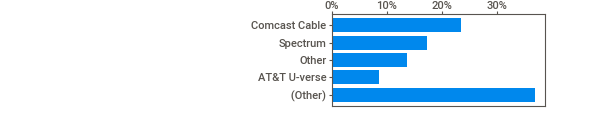
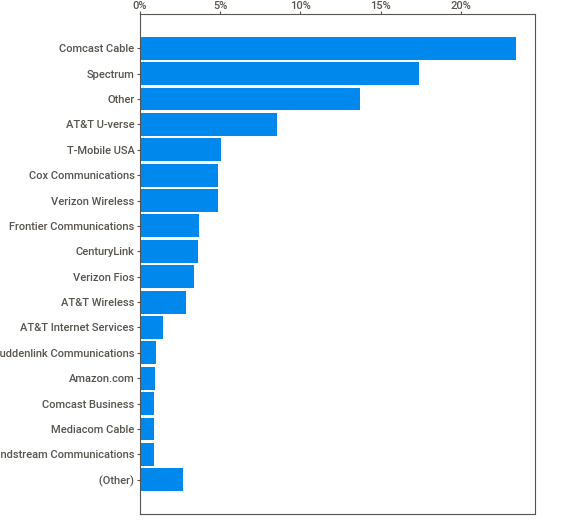
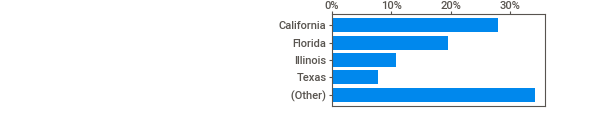
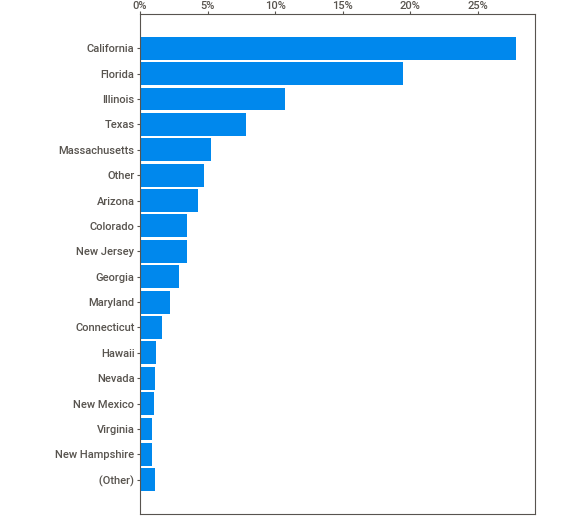
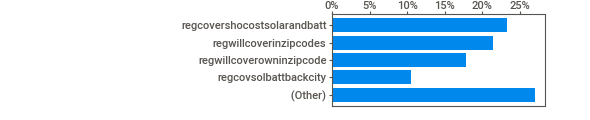
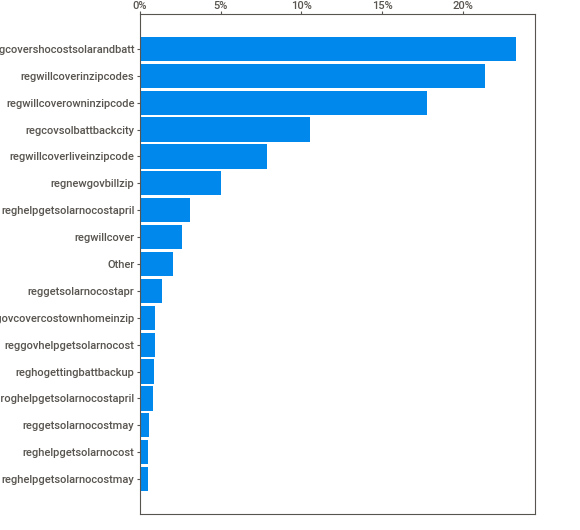
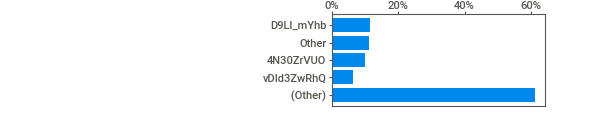
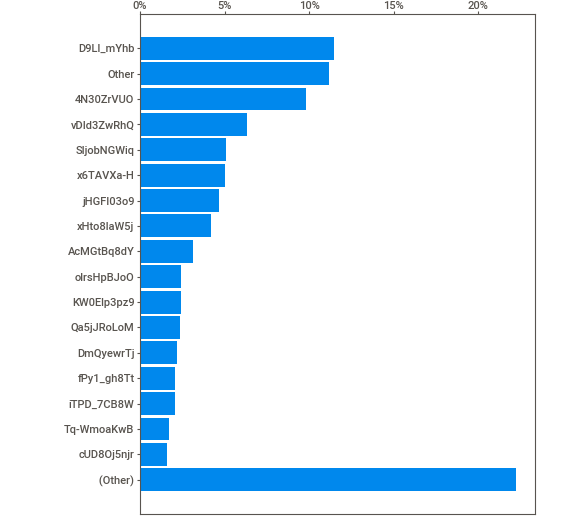
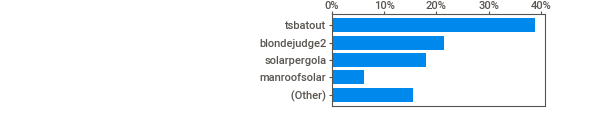
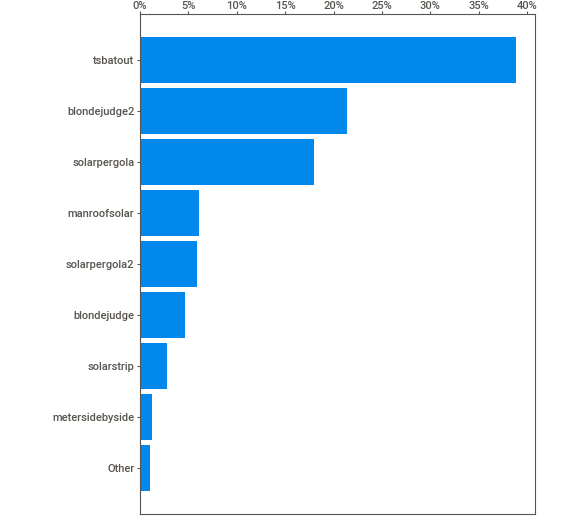
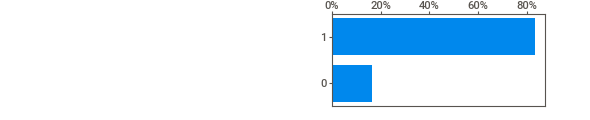
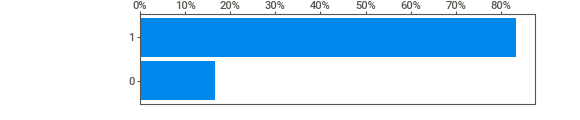
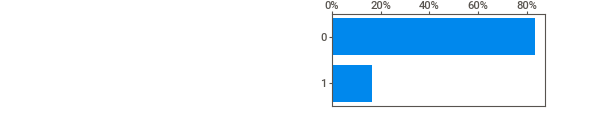
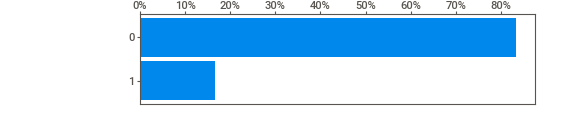
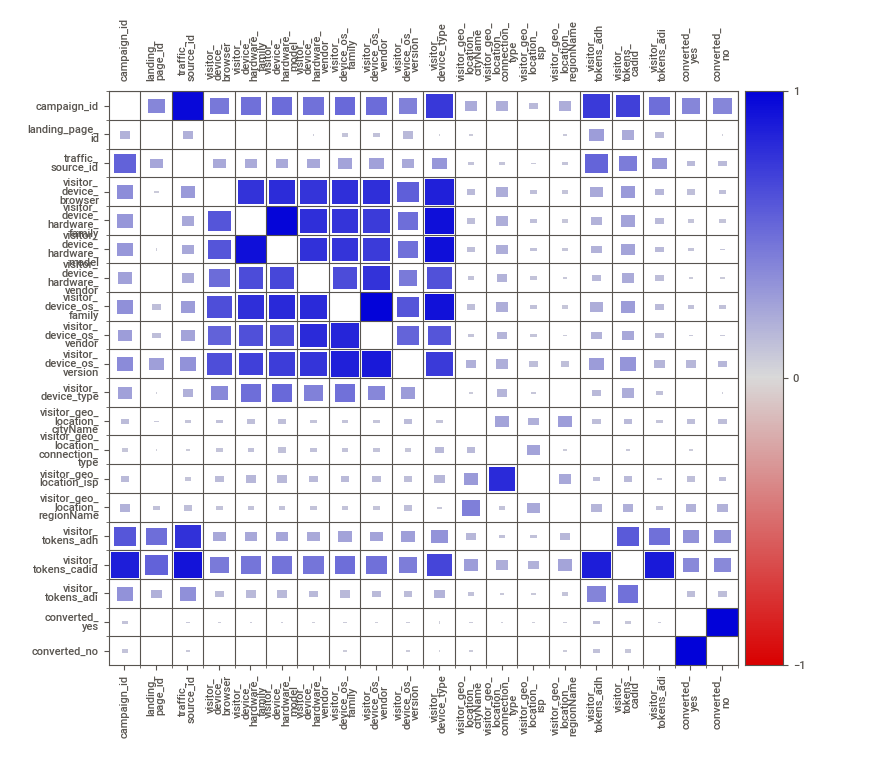
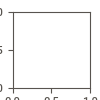

In [ ]:
# Se muestra la salida
sweet_report.show_notebook()

In [11]:
df.isna().sum().sort_values()

campaign_id                             0
visitor_tokens_adi                      0
visitor_tokens_cadid                    0
visitor_tokens_adh                      0
visitor_geo_location_regionName         0
visitor_geo_location_isp                0
visitor_geo_location_connection_type    0
visitor_geo_location_cityName           0
visitor_device_type                     0
visitor_device_os_version               0
visitor_device_os_vendor                0
visitor_device_os_family                0
visitor_device_hardware_vendor          0
visitor_device_hardware_model           0
visitor_device_hardware_family          0
visitor_device_browser                  0
traffic_source_id                       0
landing_page_id                         0
converted_yes                           0
converted_no                            0
dtype: int64

In [12]:
df.shape

(1497, 20)

In [13]:
encoder=preprocessing.LabelEncoder()

encoder_dict =defaultdict(LabelEncoder)
labeled_df = df.apply(lambda x: encoder_dict[x.name].fit_transform(x))
#labeled_df = df.apply(lambda x: encoder_dict[x.name].fit_transform(x))

In [14]:
labeled_df

,campaign_id,landing_page_id,traffic_source_id,visitor_device_browser,visitor_device_hardware_family,visitor_device_hardware_model,visitor_device_hardware_vendor,visitor_device_os_family,visitor_device_os_vendor,visitor_device_os_version,visitor_device_type,visitor_geo_location_cityName,visitor_geo_location_connection_type,visitor_geo_location_isp,visitor_geo_location_regionName,visitor_tokens_adh,visitor_tokens_cadid,visitor_tokens_adi,converted_yes,converted_no
0,22,1,0,11,8,0,0,6,0,3,0,17,2,3,16,0,15,0,0,1
1,22,2,0,10,8,0,0,6,0,15,0,17,0,7,1,0,15,0,0,1
2,22,2,5,11,8,0,0,1,0,15,0,2,2,3,18,0,34,8,0,1
3,22,1,5,10,0,7,7,1,4,16,0,17,0,7,14,0,34,8,0,1
4,22,1,5,5,9,1,5,0,1,15,1,28,2,5,16,0,34,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,21,2,3,11,8,0,0,6,0,2,0,17,1,2,16,16,2,2,1,0
1493,21,1,3,3,10,8,0,5,0,10,2,17,0,7,5,16,2,2,1,0
1494,21,1,3,11,8,0,0,6,0,15,0,17,0,7,13,16,2,2,1,0
1495,21,1,3,11,8,0,0,6,0,2,0,17,0,8,0,5,15,2,1,0


In [15]:
df.columns

Index(['campaign_id', 'landing_page_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_isp', 'visitor_geo_location_regionName',
       'visitor_tokens_adh', 'visitor_tokens_cadid', 'visitor_tokens_adi',
       'converted_yes', 'converted_no'],
      dtype='object')

In [16]:
X = labeled_df[['campaign_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_isp', 'visitor_geo_location_regionName',
       'visitor_tokens_adh', 'visitor_tokens_cadid', 'visitor_tokens_adi',
       'converted_yes', 'converted_no']]

In [17]:
#salidas
y=labeled_df[["landing_page_id"]]

In [18]:
#scaler
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       123
           1       0.55      0.44      0.49       129
           2       0.49      0.58      0.53       123

    accuracy                           0.65       375
   macro avg       0.65      0.65      0.65       375
weighted avg       0.65      0.65      0.64       375



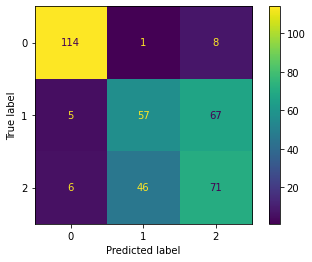

In [19]:
# red neural
mlp=MLPClassifier(hidden_layer_sizes=(7,7,7), max_iter=200, solver='adam', random_state=1, tol=0.000000001)
#mlp=MLPClassifier(hidden_layer_sizes=(6,6,6), max_iter=100)
mlp.fit(X_train, y_train)
predictions=mlp.predict(X_test)
print (classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

# Aplicando una Red Neuronal Secuencial

In [20]:
# carga los datos
df = pd.read_excel('631d8277776f1d001a21e6eb_120922_clear.xlsx') 

In [21]:
df.shape

(1497, 20)

In [22]:
df.dtypes

campaign_id                             object
landing_page_id                         object
traffic_source_id                       object
visitor_device_browser                  object
visitor_device_hardware_family          object
visitor_device_hardware_model           object
visitor_device_hardware_vendor          object
visitor_device_os_family                object
visitor_device_os_vendor                object
visitor_device_os_version               object
visitor_device_type                     object
visitor_geo_location_cityName           object
visitor_geo_location_connection_type    object
visitor_geo_location_isp                object
visitor_geo_location_regionName         object
visitor_tokens_adh                      object
visitor_tokens_cadid                    object
visitor_tokens_adi                      object
converted_yes                            int64
converted_no                             int64
dtype: object

In [23]:
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_tokens_adh"] = df["visitor_tokens_adh"].apply(str)
df["visitor_tokens_cadid"] = df["visitor_tokens_cadid"].apply(str)
df["converted_yes"] = df["converted_yes"].apply(str)
df["converted_no"] = df["converted_no"].apply(str)

In [24]:
df.dtypes

campaign_id                             object
landing_page_id                         object
traffic_source_id                       object
visitor_device_browser                  object
visitor_device_hardware_family          object
visitor_device_hardware_model           object
visitor_device_hardware_vendor          object
visitor_device_os_family                object
visitor_device_os_vendor                object
visitor_device_os_version               object
visitor_device_type                     object
visitor_geo_location_cityName           object
visitor_geo_location_connection_type    object
visitor_geo_location_isp                object
visitor_geo_location_regionName         object
visitor_tokens_adh                      object
visitor_tokens_cadid                    object
visitor_tokens_adi                      object
converted_yes                           object
converted_no                            object
dtype: object

In [25]:
df.isna().sum().sort_values()

campaign_id                             0
visitor_tokens_adi                      0
visitor_tokens_cadid                    0
visitor_tokens_adh                      0
visitor_geo_location_regionName         0
visitor_geo_location_isp                0
visitor_geo_location_connection_type    0
visitor_geo_location_cityName           0
visitor_device_type                     0
visitor_device_os_version               0
visitor_device_os_vendor                0
visitor_device_os_family                0
visitor_device_hardware_vendor          0
visitor_device_hardware_model           0
visitor_device_hardware_family          0
visitor_device_browser                  0
traffic_source_id                       0
landing_page_id                         0
converted_yes                           0
converted_no                            0
dtype: int64

In [26]:
df.columns

Index(['campaign_id', 'landing_page_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_isp', 'visitor_geo_location_regionName',
       'visitor_tokens_adh', 'visitor_tokens_cadid', 'visitor_tokens_adi',
       'converted_yes', 'converted_no'],
      dtype='object')

In [27]:
X = df[['campaign_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_isp', 'visitor_geo_location_regionName',
       'visitor_tokens_adh', 'visitor_tokens_cadid', 'visitor_tokens_adi',
       'converted_yes', 'converted_no']]

In [28]:
X = X.astype(str).to_numpy()

In [29]:
y = df[["landing_page_id"]].to_numpy()

In [30]:
# encode string input values as integers
encoded_x = None
for i in range(0, X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = numpy.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)
#onehot_encoder = OneHotEncoder(sparse=False, categories='auto')

X shape: :  (1497, 259)


In [31]:
encoded_x

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [32]:
from keras.utils import np_utils

In [33]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(label_encoded_y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_x, dummy_y, test_size=0.20, random_state=123)

In [35]:
# Definición del modelo
def modelo_mlp(): 
    model = Sequential()
    model.add(Dense(300, input_dim=X_train.shape[1], 
                kernel_initializer= 'he_uniform',
                activation='relu', activity_regularizer=regularizers.l2(1e-4)))
    #model.add(Dropout(0.9))
    #model.add(Dense(100, kernel_initializer= 'he_uniform',
    #            activation='relu',activity_regularizer=regularizers.l2(1e-4)))
    model.add(Dropout(0.6))
    model.add(Dense(50, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l2(1e-4)))
    model.add(Dropout(0.3))
    model.add(Dense(3, kernel_initializer= 'he_uniform',
                activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [36]:
model = modelo_mlp()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               78000     
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                15050     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 93,203
Trainable params: 93,203
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Entrenamos el modelo con el dataset
history=model.fit(X_train, y_train, epochs=20, batch_size=36, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/20
34/34 [==============================] - 1s 11ms/step - loss: 1.0711 - accuracy: 0.4403 - val_loss: 0.8626 - val_accuracy: 0.6133
Epoch 2/20
34/34 [==============================] - 0s 5ms/step - loss: 0.8426 - accuracy: 0.5881 - val_loss: 0.6469 - val_accuracy: 0.6467
Epoch 3/20
34/34 [==============================] - 0s 5ms/step - loss: 0.6828 - accuracy: 0.6232 - val_loss: 0.5346 - val_accuracy: 0.6733
Epoch 4/20
34/34 [==============================] - 0s 5ms/step - loss: 0.5848 - accuracy: 0.6742 - val_loss: 0.4962 - val_accuracy: 0.6800
Epoch 5/20
34/34 [==============================] - 0s 4ms/step - loss: 0.5496 - accuracy: 0.6717 - val_loss: 0.4787 - val_accuracy: 0.6833
Epoch 6/20
34/34 [==============================] - 0s 5ms/step - loss: 0.5157 - accuracy: 0.6951 - val_loss: 0.4743 - val_accuracy: 0.6733
Epoch 7/20
34/34 [==============================] - 0s 4ms/step - loss: 0.4926 - accuracy: 0.7235 - val_loss: 0.4716 - val_accuracy: 0.6567
Epoch 8/20
34/34 [=

In [38]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))

Precisión Entrenamiento: 0.8480
Precisión Prueba:  0.6767


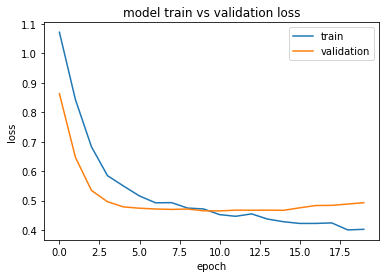

In [39]:
from matplotlib import pyplot
from numpy import array
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [40]:
#Making confusion matrix that checks accuracy of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

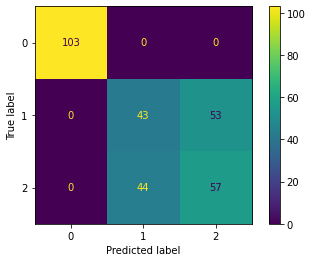

In [41]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [42]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       0.49      0.45      0.47        96
           2       0.52      0.56      0.54       101

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.68      0.68      0.68       300



# Aplicando una Red Neuronal Ordinal Encoder

In [44]:
# carga los datos
df = pd.read_excel('631d8277776f1d001a21e6eb_120922_clear.xlsx') 

In [45]:
df.dtypes

campaign_id                             object
landing_page_id                         object
traffic_source_id                       object
visitor_device_browser                  object
visitor_device_hardware_family          object
visitor_device_hardware_model           object
visitor_device_hardware_vendor          object
visitor_device_os_family                object
visitor_device_os_vendor                object
visitor_device_os_version               object
visitor_device_type                     object
visitor_geo_location_cityName           object
visitor_geo_location_connection_type    object
visitor_geo_location_isp                object
visitor_geo_location_regionName         object
visitor_tokens_adh                      object
visitor_tokens_cadid                    object
visitor_tokens_adi                      object
converted_yes                            int64
converted_no                             int64
dtype: object

In [46]:
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_tokens_adh"] = df["visitor_tokens_adh"].apply(str)
df["visitor_tokens_cadid"] = df["visitor_tokens_cadid"].apply(str)
df["converted_yes"] = df["converted_yes"].apply(str)
df["converted_no"] = df["converted_no"].apply(str)

In [47]:
df.isna().sum().sort_values()

campaign_id                             0
visitor_tokens_adi                      0
visitor_tokens_cadid                    0
visitor_tokens_adh                      0
visitor_geo_location_regionName         0
visitor_geo_location_isp                0
visitor_geo_location_connection_type    0
visitor_geo_location_cityName           0
visitor_device_type                     0
visitor_device_os_version               0
visitor_device_os_vendor                0
visitor_device_os_family                0
visitor_device_hardware_vendor          0
visitor_device_hardware_model           0
visitor_device_hardware_family          0
visitor_device_browser                  0
traffic_source_id                       0
landing_page_id                         0
converted_yes                           0
converted_no                            0
dtype: int64

In [48]:
df.columns

Index(['campaign_id', 'landing_page_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_isp', 'visitor_geo_location_regionName',
       'visitor_tokens_adh', 'visitor_tokens_cadid', 'visitor_tokens_adi',
       'converted_yes', 'converted_no'],
      dtype='object')

In [49]:
df.shape

(1497, 20)

In [50]:
df.columns

Index(['campaign_id', 'landing_page_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_isp', 'visitor_geo_location_regionName',
       'visitor_tokens_adh', 'visitor_tokens_cadid', 'visitor_tokens_adi',
       'converted_yes', 'converted_no'],
      dtype='object')

In [51]:
X = df[['campaign_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_isp', 'visitor_geo_location_regionName',
       'visitor_tokens_adh', 'visitor_tokens_cadid', 'visitor_tokens_adi',
       'converted_yes', 'converted_no']]

In [52]:
X = X.astype(str).to_numpy()

In [53]:
y = df[["landing_page_id"]].to_numpy()

In [54]:
# encode string input values as integers
encoded_x = None
for i in range(0, X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OrdinalEncoder()
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = numpy.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)
#onehot_encoder = OneHotEncoder(sparse=False, categories='auto')

X shape: :  (1497, 19)


In [55]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(label_encoded_y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_x, dummy_y , test_size=0.20, random_state=123)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [58]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

In [59]:
X_train

array([[ 1.23643744,  1.28039811, -0.31427112, ..., -1.22502982,
         0.45859944, -0.45859944],
       [-1.15333447, -1.24662009, -0.31427112, ..., -0.08092525,
         0.45859944, -0.45859944],
       [-1.00397372, -1.24662009, -0.90855631, ..., -0.08092525,
         0.45859944, -0.45859944],
       ...,
       [ 1.23643744,  1.28039811, -0.31427112, ..., -1.22502982,
         0.45859944, -0.45859944],
       [ 1.23643744,  1.28039811, -1.20569891, ..., -1.22502982,
         0.45859944, -0.45859944],
       [ 1.23643744,  1.28039811, -0.31427112, ..., -1.22502982,
         0.45859944, -0.45859944]])

In [65]:
# Definición del modelo
def modelo_mlp(): 
    model = Sequential()
    model.add(Dense(25, input_dim=X_train.shape[1], 
                kernel_initializer= 'he_uniform',
                activation='relu', activity_regularizer=regularizers.l2(1e-4)))
    #model.add(Dropout(0.9))
    #model.add(Dense(10, kernel_initializer= 'he_uniform',
    #            activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    model.add(Dropout(0.6))
    model.add(Dense(5, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l2(1e-4)))
    model.add(Dropout(0.3))  
    model.add(Dense(3, kernel_initializer= 'he_uniform',
                activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [66]:
model = modelo_mlp()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                500       
                                                                 
 dropout_4 (Dropout)         (None, 25)                0         
                                                                 
 dense_7 (Dense)             (None, 5)                 130       
                                                                 
 dropout_5 (Dropout)         (None, 5)                 0         
                                                                 
 dense_8 (Dense)             (None, 3)                 18        
                                                                 
Total params: 648
Trainable params: 648
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Entrenamos el modelo con el dataset
history=model.fit(X_train, y_train, epochs=20, batch_size=36, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/20
34/34 [==============================] - 1s 9ms/step - loss: 1.8630 - accuracy: 0.2882 - val_loss: 1.2798 - val_accuracy: 0.2933
Epoch 2/20
34/34 [==============================] - 0s 3ms/step - loss: 1.6196 - accuracy: 0.3066 - val_loss: 1.1873 - val_accuracy: 0.2800
Epoch 3/20
34/34 [==============================] - 0s 3ms/step - loss: 1.4105 - accuracy: 0.3091 - val_loss: 1.1336 - val_accuracy: 0.3233
Epoch 4/20
34/34 [==============================] - 0s 3ms/step - loss: 1.3880 - accuracy: 0.3300 - val_loss: 1.1005 - val_accuracy: 0.3367
Epoch 5/20
34/34 [==============================] - 0s 4ms/step - loss: 1.2500 - accuracy: 0.3325 - val_loss: 1.0850 - val_accuracy: 0.3733
Epoch 6/20
34/34 [==============================] - 0s 3ms/step - loss: 1.2137 - accuracy: 0.3509 - val_loss: 1.0758 - val_accuracy: 0.3867
Epoch 7/20
34/34 [==============================] - 0s 3ms/step - loss: 1.1744 - accuracy: 0.3567 - val_loss: 1.0697 - val_accuracy: 0.3833
Epoch 8/20
34/34 [==

In [68]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))

Precisión Entrenamiento: 0.5480
Precisión Prueba:  0.5200


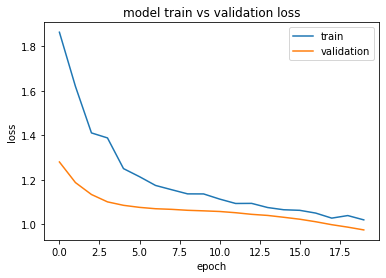

In [69]:
from matplotlib import pyplot
from numpy import array
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [70]:
#Making confusion matrix that checks accuracy of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

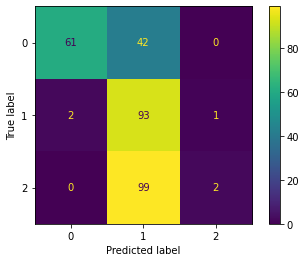

In [71]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [72]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.59      0.73       103
           1       0.40      0.97      0.56        96
           2       0.67      0.02      0.04       101

    accuracy                           0.52       300
   macro avg       0.68      0.53      0.45       300
weighted avg       0.68      0.52      0.45       300



# Aplicando Validacion cruzada

In [73]:
# carga los datos
df = pd.read_excel('631d8277776f1d001a21e6eb_120922_clear.xlsx') 

In [74]:
df.dtypes

campaign_id                             object
landing_page_id                         object
traffic_source_id                       object
visitor_device_browser                  object
visitor_device_hardware_family          object
visitor_device_hardware_model           object
visitor_device_hardware_vendor          object
visitor_device_os_family                object
visitor_device_os_vendor                object
visitor_device_os_version               object
visitor_device_type                     object
visitor_geo_location_cityName           object
visitor_geo_location_connection_type    object
visitor_geo_location_isp                object
visitor_geo_location_regionName         object
visitor_tokens_adh                      object
visitor_tokens_cadid                    object
visitor_tokens_adi                      object
converted_yes                            int64
converted_no                             int64
dtype: object

In [75]:
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_tokens_adh"] = df["visitor_tokens_adh"].apply(str)
df["visitor_tokens_cadid"] = df["visitor_tokens_cadid"].apply(str)
df["converted_yes"] = df["converted_yes"].apply(str)
df["converted_no"] = df["converted_no"].apply(str)

In [76]:
df.isna().sum().sort_values()

campaign_id                             0
visitor_tokens_adi                      0
visitor_tokens_cadid                    0
visitor_tokens_adh                      0
visitor_geo_location_regionName         0
visitor_geo_location_isp                0
visitor_geo_location_connection_type    0
visitor_geo_location_cityName           0
visitor_device_type                     0
visitor_device_os_version               0
visitor_device_os_vendor                0
visitor_device_os_family                0
visitor_device_hardware_vendor          0
visitor_device_hardware_model           0
visitor_device_hardware_family          0
visitor_device_browser                  0
traffic_source_id                       0
landing_page_id                         0
converted_yes                           0
converted_no                            0
dtype: int64

In [77]:
df.columns

Index(['campaign_id', 'landing_page_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_isp', 'visitor_geo_location_regionName',
       'visitor_tokens_adh', 'visitor_tokens_cadid', 'visitor_tokens_adi',
       'converted_yes', 'converted_no'],
      dtype='object')

In [78]:
X = df[['campaign_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_isp', 'visitor_geo_location_regionName',
       'visitor_tokens_adh', 'visitor_tokens_cadid', 'visitor_tokens_adi',
       'converted_yes', 'converted_no']]


In [79]:
X = X.astype(str).to_numpy()

In [80]:
y = df[["landing_page_id"]].to_numpy()

In [81]:
# encode string input values as integers
encoded_x = None
for i in range(0, X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = numpy.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)
#onehot_encoder = OneHotEncoder(sparse=False, categories='auto')


X shape: :  (1497, 259)


In [82]:
from keras.utils import np_utils
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(label_encoded_y)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
# mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [84]:
# Definición del modelo
def modelo_mlp(n_inputs,n_outputs): 
    model = Sequential()
    model.add(Dense(300, input_dim=n_inputs, 
                kernel_initializer= 'he_uniform',
                activation='relu', activity_regularizer=regularizers.l1(1e-4)))
    #model.add(Dropout(0.9))
    #model.add(Dense(1000, kernel_initializer= 'he_uniform',
    #            activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    model.add(Dropout(0.6))
    model.add(Dense(50, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    model.add(Dropout(0.3))  
    model.add(Dense(n_outputs, kernel_initializer= 'he_uniform',
                activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    return model

In [85]:
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(encoded_x, dummy_y):
	results = list()
	n_inputs, n_outputs = encoded_x.shape[1], dummy_y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(encoded_x):
		# prepare data
		X_train, X_test = encoded_x[train_ix], encoded_x[test_ix]
		y_train, y_test = dummy_y[train_ix], dummy_y[test_ix]
		# define model
		model = modelo_mlp(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=100)
		# make a prediction on the test set
		yhat = model.predict(X_test)
		# round probabilities to class labels
		yhat = yhat.round()
		# calculate accuracy
		acc = accuracy_score(y_test, yhat)
		# store result
		print('>%.3f' % acc)
		results.append(acc)
	return results

In [86]:
# evaluate model
results = evaluate_model(encoded_x, dummy_y)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

>0.660
>0.647
>0.653
>0.687
>0.660
>0.607
>0.640
>0.658
>0.644
>0.705
>0.613
>0.647
>0.693
>0.607
>0.707
>0.647
>0.607
>0.678
>0.591
>0.597
>0.640
>0.640
>0.713
>0.593
>0.613
>0.673
>0.620
>0.705
>0.631
>0.664
Accuracy: 0.648 (0.035)
